In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
#load  the dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [38]:
#Histogram (Distribution of Data)
#Purpose: Histogram help us understand the distribution of a single variable whether it's normal, skewed, or has outliner

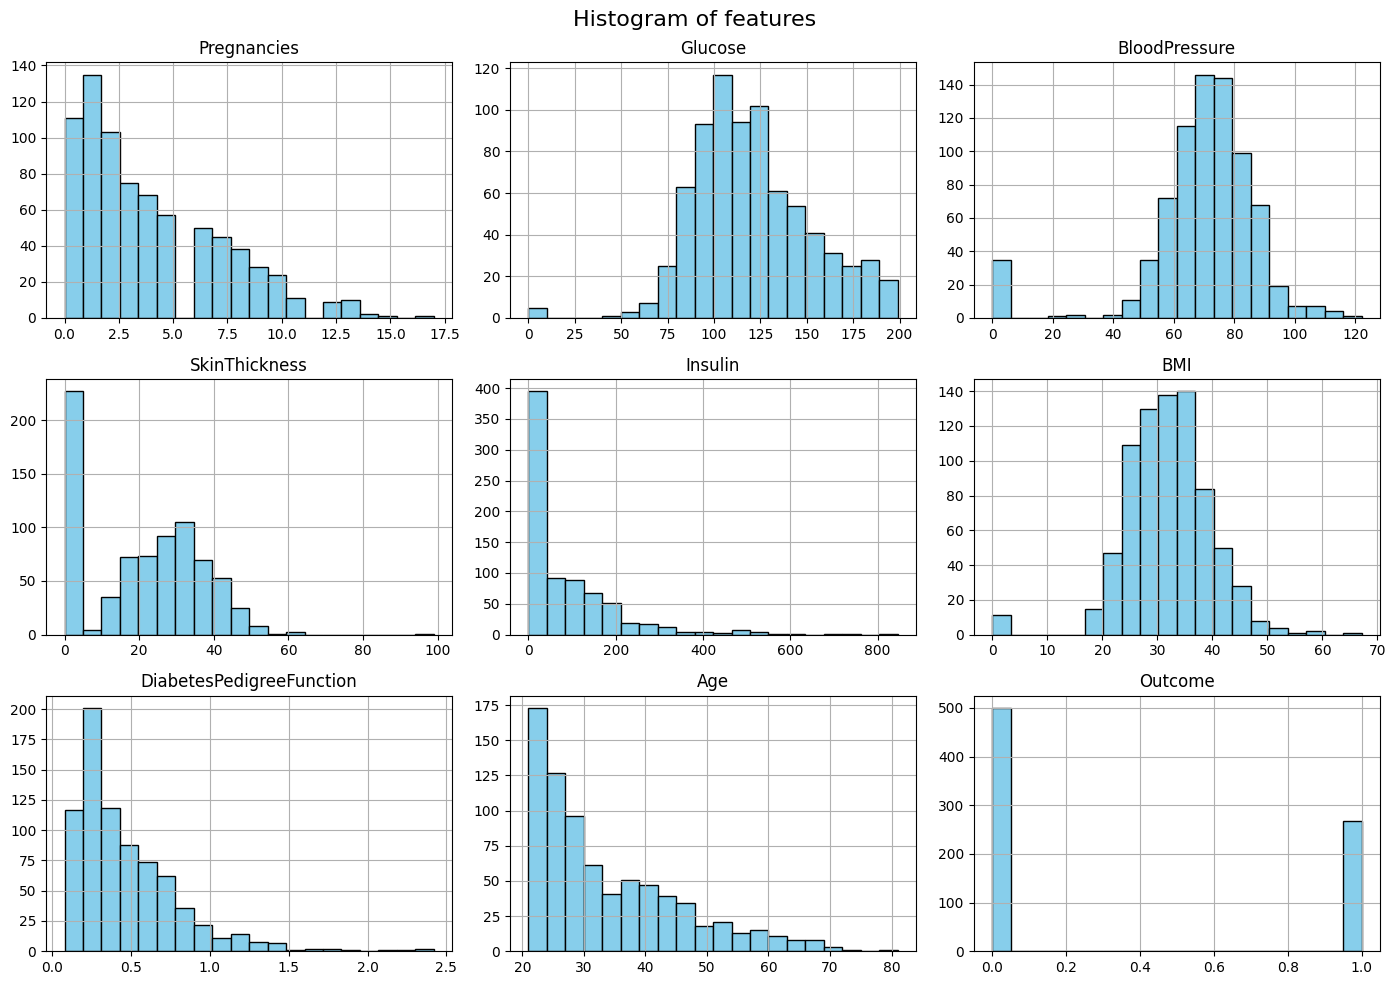

In [39]:
diabetes_df.hist(figsize=(14,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histogram of features', fontsize=16)
plt.tight_layout()
plt.show()

In [40]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

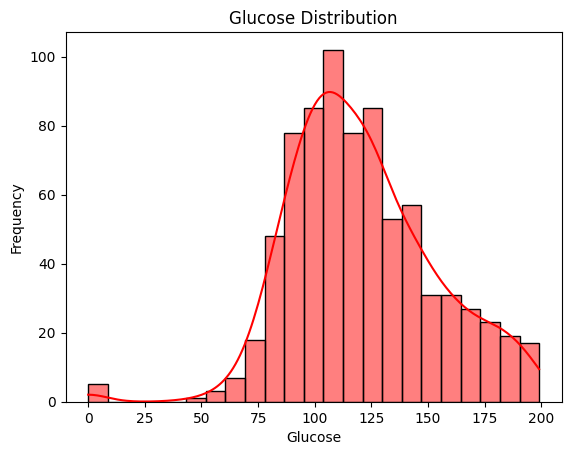

In [41]:
sns.histplot(data=diabetes_df,x='Glucose',kde=True, color='red')
plt.title('Glucose Distribution')
plt.ylabel('Frequency')
plt.show()

In [42]:
#Boxplot (Detecting Outliers)
#Purpose: Boxplots reveals the spread of the data, the median and potential outliers (those outside 1.5*IQR)


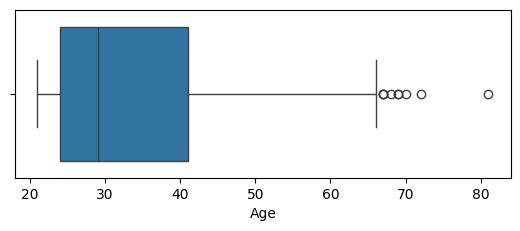

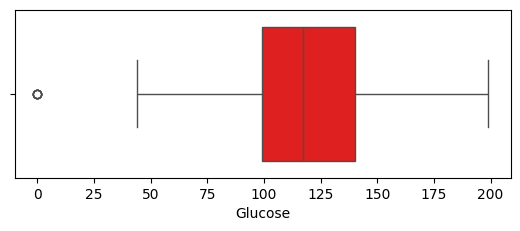

In [43]:
plt.subplot (2,1,1)
sns.boxplot(x=diabetes_df['Age'])
plt.show()

plt.subplot(2,1,2)
sns.boxplot (x=diabetes_df['Glucose'], color='red')
plt.show()

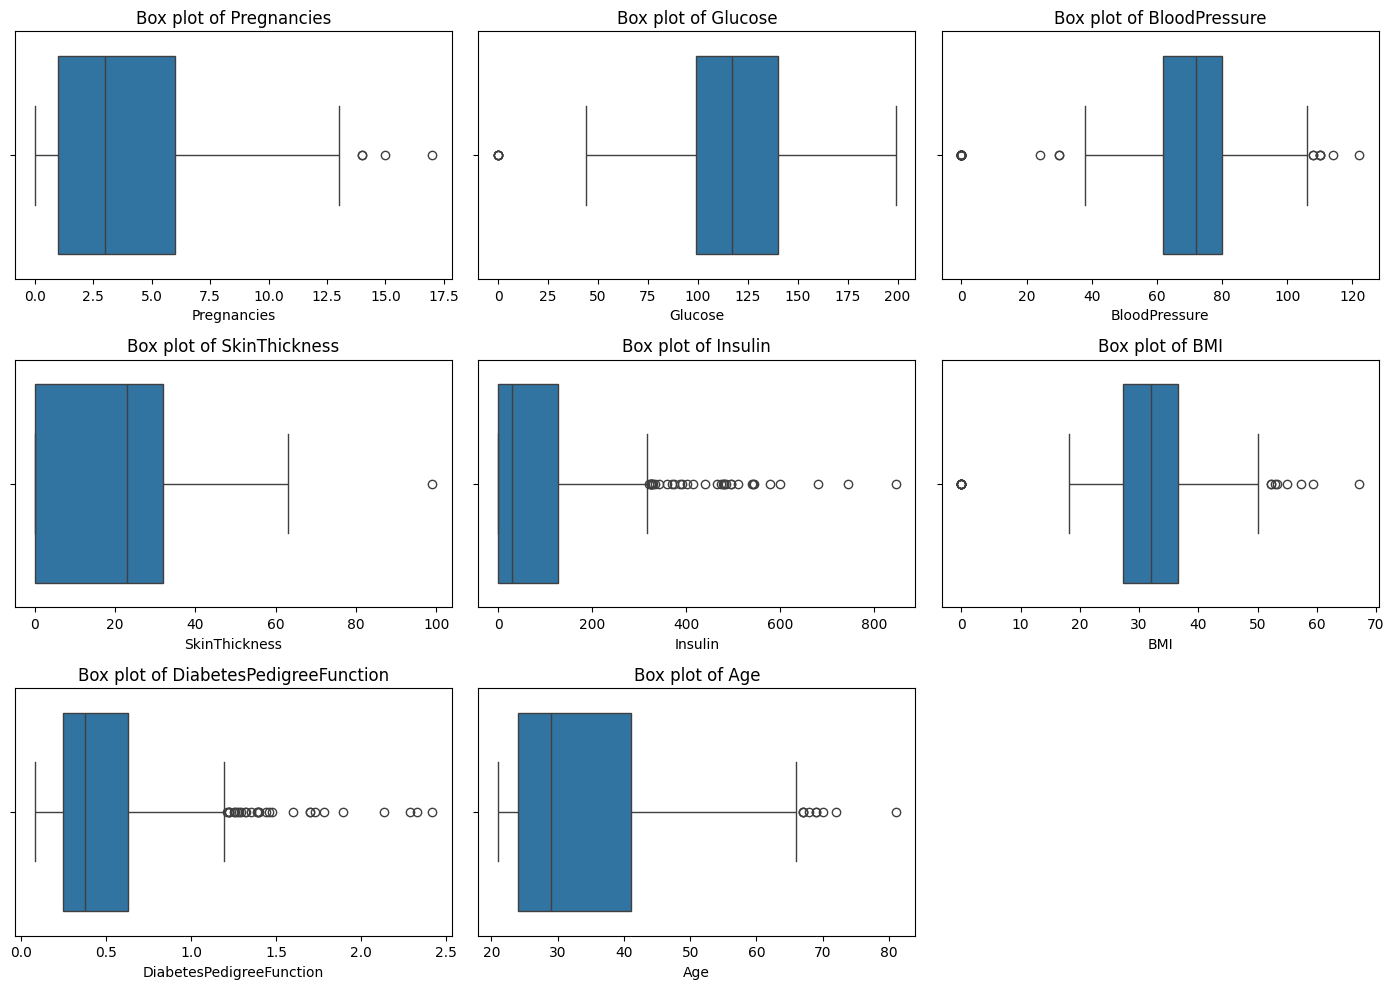

In [44]:
plt.figure(figsize=(14,10))
for i, col in enumerate(diabetes_df.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.boxplot(x=diabetes_df[col])
    plt.title('Box plot of '+col)
    # plt.title(f'Box plot of {col})
plt.tight_layout()
plt.show()

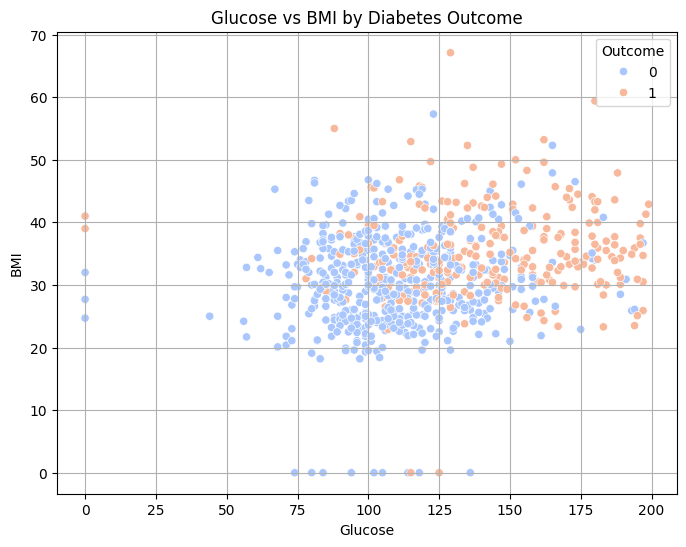

In [45]:
# scatter plot between Glucose and BMI colored by outcome
plt.figure(figsize=(8,6))
sns.scatterplot(data= diabetes_df, x= 'Glucose',y='BMI',palette='coolwarm', hue='Outcome')
plt.title('Glucose vs BMI by Diabetes Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

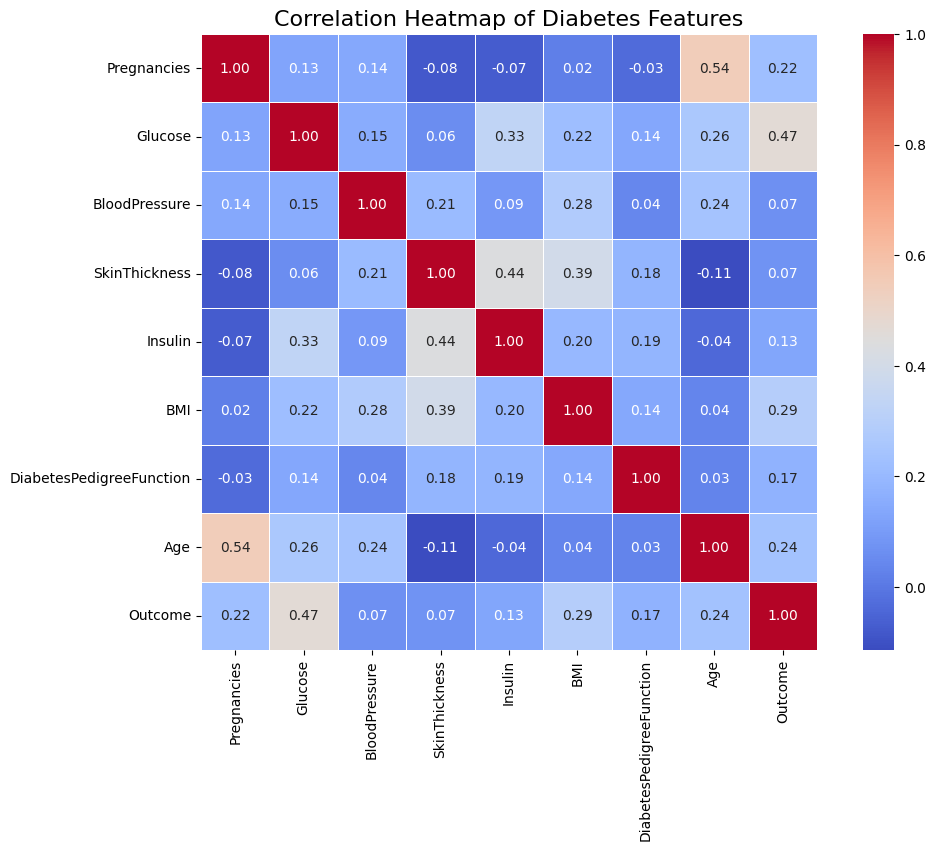

In [46]:
# correlation heatmap
# understand relationships between variable


corr = diabetes_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", square=True,cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Features', fontsize = 16)
plt.show()

In [47]:
#correlation with the target only
corr_target = corr["Outcome"].drop('Outcome').sort_values(ascending=False)
corr_target

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [48]:
# Display highly correlated features
print("features with correlation > 0.2 with Outcome:")

print(corr_target[corr_target.abs() > 0.2])

features with correlation > 0.2 with Outcome:
Glucose        0.466581
BMI            0.292695
Age            0.238356
Pregnancies    0.221898
Name: Outcome, dtype: float64


In [49]:
# identify features with Invalid Zero Values
diabetes_df.eq(0).sum()

# features where 0 is NOT a valid  value
invalid_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [50]:
diabetes_df[invalid_zero_columns] = diabetes_df[invalid_zero_columns].replace(0, np.nan)

# impute missing values with median
for col in invalid_zero_columns:
    median_value = diabetes_df[col].median()
    diabetes_df[col].fillna(median_value, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_13496\1764104367.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df[col].fillna(median_value, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_13496\1764104367.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [51]:
# verify iputation
diabetes_df[invalid_zero_columns].isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [52]:
# count zero values
diabetes_df[invalid_zero_columns].eq(0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler

# Separate feeatures and target
x = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Initialize scaler
scaler = StandardScaler()

# fit and transform the features
x_scaled = scaler.fit_transform(x)

# Now, all features have mean 0 and std deviation 1

x_scaled

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [54]:
x_scaled_df = pd.DataFrame(x_scaled, columns=diabetes_df.columns[:-1])

In [55]:
# Use MinMaxScaler
# This will scale all features to between 0 and 1

In [56]:
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies']
x_selected = x_scaled_df[selected_features]

x_selected

,Glucose,BMI,Age,Pregnancies
0,0.866045,0.166619,1.425995,0.639947
1,-1.205066,-0.852200,-0.190672,-0.844885
2,2.016662,-1.332500,-0.105584,1.233880
3,-1.073567,-0.633881,-1.041549,-0.844885
4,0.504422,1.549303,-0.020496,-1.141852
...,...,...,...,...
763,-0.679069,0.064737,2.532136,1.827813
764,0.011301,0.632365,-0.531023,-0.547919
765,-0.021574,-0.910418,-0.275760,0.342981
766,0.142800,-0.342790,1.170732,-0.844885


In [57]:
# Scale selected Features to deploy
new_scaler = StandardScaler()

x_selected_features = diabetes_df[['Glucose', 'BMI', 'Age', 'Pregnancies']]

In [58]:
# x_selected_Features
y_new = diabetes_df['Outcome']

x_scaled_selected_features = new_scaler.fit_transform(x_selected_features)

x_scaled_selected_features

array([[ 0.86604475,  0.16661938,  1.4259954 ,  0.63994726],
       [-1.20506583, -0.85219976, -0.19067191, -0.84488505],
       [ 2.01666174, -1.33250021, -0.10558415,  1.23388019],
       ...,
       [-0.02157407, -0.910418  , -0.27575966,  0.3429808 ],
       [ 0.14279979, -0.34279019,  1.17073215, -0.84488505],
       [-0.94206766, -0.29912651, -0.87137393, -0.84488505]],
      shape=(768, 4))

In [59]:
x_scaled_selected_features_df = pd.DataFrame(x_scaled_selected_features, columns=['Glucose', 'BMI', 'Age', 'Pregnancies'])

x_scaled_selected_features_df

,Glucose,BMI,Age,Pregnancies
0,0.866045,0.166619,1.425995,0.639947
1,-1.205066,-0.852200,-0.190672,-0.844885
2,2.016662,-1.332500,-0.105584,1.233880
3,-1.073567,-0.633881,-1.041549,-0.844885
4,0.504422,1.549303,-0.020496,-1.141852
...,...,...,...,...
763,-0.679069,0.064737,2.532136,1.827813
764,0.011301,0.632365,-0.531023,-0.547919
765,-0.021574,-0.910418,-0.275760,0.342981
766,0.142800,-0.342790,1.170732,-0.844885


In [60]:
x_new = x_scaled_selected_features_df

In [61]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Selected freatures and target
x = x_scaled_df[['Glucose', 'BMI', 'Age', 'Pregnancies']]
y = y

In [62]:
# Split: 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [65]:
# Make Predictions
y_pred = model.predict(x_test)

y_prob =model.predict_proba(x_test)[:,-1]

In [69]:
from sklearn.model_selection import train_test_split

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new,y_new, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LogisticRegression
new_model = LogisticRegression()

In [71]:
# Initialize and train the model
new_model.fit(x_new_train, y_new_train)

LogisticRegression()

In [73]:
# Make prediction
# Predict classes
new_y_pred = new_model.predict(x_new_test)

# Predict probability
new_y_pred = new_model.predict_proba(x_new_test)[:, 1]

In [75]:
import joblib

# Save the trained model
joblib.dump(new_model, 'new_diabetes_model.pkl')

# Save the scaled value
joblib.dump(new_scaler, 'new_scaler.pkl')

['new_scaler.pkl']

In [66]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [67]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("f1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7662337662337663
Precision: 0.6938775510204082
Recall: 0.6181818181818182
f1 Score: 0.6538461538461539
